In [1]:
import pandas as pd 
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

In [2]:
# 1.- Cargar Cnoiseless
Cnoiseless = np.load("/Users/guillermosanchezalmanza/Desktop/GEVP/Cnoiseless.npy");

In [3]:
Cnoiseless.shape

(5, 5, 96)

In [4]:
# C(to)v(n)=Lambda(n)v(n)

In [5]:
# 2.- Fixed Diagonalization Time
N=5
T=96
def gevp_fixed(Cnoiseless, t0):
    Evalues, Evectors = eigh(Cnoiseless[:, :, t0])
    projected = np.zeros((N, T))
    
    for t in range(T):
        Ct = Cnoiseless[:, :, t]
        for n in range(N):
            v = Evectors[:, n]
            # Overlap proyectado
            projected[n, t] = np.real_if_close(np.conj(v) @ Ct @ v)
    return projected, Evalues, Evectors

In [6]:
t0 = 50  #tiempo de diagonalización
projected, Evalues, Evectors = gevp_fixed(Cnoiseless, t0)

In [7]:
Evalues.shape

(5,)

In [8]:
N=5
T=96
def compute_Eff(projected):
    N,T = projected.shape
    Eff = np.zeros((N,T-1))
    for k in range(N):
        for t in range(1,T):
            Eff[k,t-1] = -np.log(projected[k,t]/projected[k,t-1])
    return Eff

Eff = compute_Eff(projected)

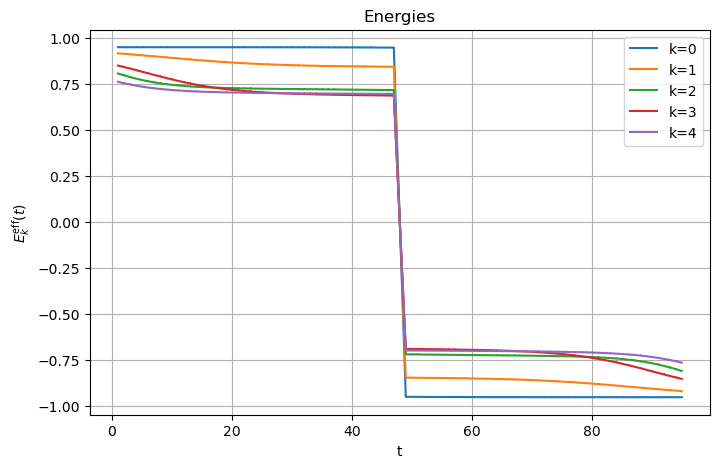

In [9]:
# Graficar Eff
plt.figure(figsize=(8,5))
for k in range(Eff.shape[0]):
    plt.plot(np.arange(1, projected.shape[1]), Eff[k], marker=',', label=f'k={k}')
plt.xlabel('t')
plt.ylabel(r'$E_k^{\rm eff}(t)$')
plt.title('Energies')
plt.legend()
plt.grid()
plt.show()